In [16]:
import pandas as pd
import seaborn as sns

# Đọc bộ dữ liệu Titanic
titanic_data = sns.load_dataset('titanic')


In [17]:
# Xem thông tin về bộ dữ liệu
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
titanic_data.dropna(inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
titanic_data['sex']= le.fit_transform(titanic_data['sex']) 
titanic_data['embarked']= le.fit_transform(titanic_data['embarked']) 
titanic_data['class']= le.fit_transform(titanic_data['class']) 
titanic_data['who']= le.fit_transform(titanic_data['who']) 
titanic_data['adult_male']= le.fit_transform(titanic_data['adult_male']) 
titanic_data['deck']= le.fit_transform(titanic_data['deck']) 
titanic_data['embark_town']= le.fit_transform(titanic_data['embark_town']) 
titanic_data['alive']= le.fit_transform(titanic_data['alive']) 
titanic_data['alone']= le.fit_transform(titanic_data['alone']) 

In [21]:
# from sklearn.preprocessing import OneHotEncoder 
# from sklearn.compose import ColumnTransformer 
   
# # creating one hot encoder object with categorical feature 0 
# # indicating the first column 
# columnTransformer = ColumnTransformer([('encoder', 
#                                         OneHotEncoder(), 
#                                         [0])], 
#                                       remainder='passthrough') 
  
# titanic_data = np.array(columnTransformer.fit_transform(titanic_data), dtype = np.str_) 
# titanic_data = np.array(columnTransformer.fit_transform(titanic_data), dtype = np.object_) 

In [22]:
# titanic_data[0]

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Chọn các biến đầu vào và đầu ra
y = titanic_data['survived']
X = titanic_data.drop('survived', axis=1)

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier()

# Đào tạo mô hình và tính toán độ quan trọng của các biến
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Hiển thị độ quan trọng của các biến
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


        Feature  Importance
12        alive    0.634805
9    adult_male    0.081673
1           sex    0.066338
2           age    0.058071
8           who    0.056099
5          fare    0.052042
10         deck    0.017076
4         parch    0.006730
3         sibsp    0.006531
11  embark_town    0.005861
6      embarked    0.004812
0        pclass    0.003828
7         class    0.003758
13        alone    0.002376


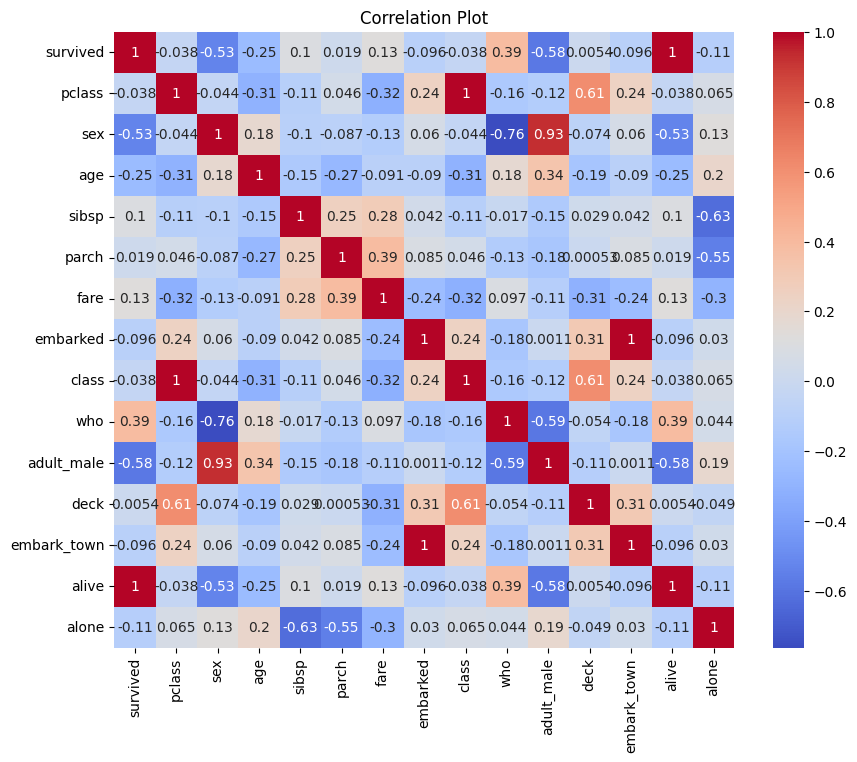

In [24]:
import matplotlib.pyplot as plt

# Tạo ma trận tương quan
correlation_matrix = titanic_data.corr()

# Hiển thị ma trận tương quan
# print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score

# Đánh giá mô hình ban đầu
initial_score = cross_val_score(rf, X, y, cv=5).mean()

# Loại bỏ một biến và đánh giá lại mô hình
for feature in X.columns:
    reduced_X = X.drop(feature, axis=1)
    reduced_score = cross_val_score(rf, reduced_X, y, cv=5).mean()
    if reduced_score > initial_score:
        print(f"Removing feature '{feature}' improved the score.")


In [26]:
# from lazypredict.Supervised import LazyRegressor
# from sklearn import datasets
# from sklearn.utils import shuffle
# import numpy as np

# boston = datasets.load_boston()
# X, y = shuffle(boston.data, boston.target, random_state=13)
# X = X.astype(np.float32)


# offset = int(X.shape[0] * 0.9)

# X_train, y_train = X[:offset], y[:offset]
# X_test, y_test = X[offset:], y[offset:]

# reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# print(models)


In [27]:
train_data = pd.DataFrame({'color': ['red', 'blue', 'green', 'red']})
encoded_train_data = pd.get_dummies(train_data)
print( encoded_train_data)
test_data = pd.DataFrame({'color': ['blue', 'green', 'green', 'red']})
encoded_test_data = test_data.reindex(columns=encoded_train_data.columns, fill_value=0)
print(encoded_test_data)


   color_blue  color_green  color_red
0       False        False       True
1        True        False      False
2       False         True      False
3       False        False       True
   color_blue  color_green  color_red
0           0            0          0
1           0            0          0
2           0            0          0
3           0            0          0
